In [1]:
from zipline import run_algorithm
from zipline.api import order_target_percent, symbol

/home/mkwon/anaconda3/envs/zip35/lib/python3.5/site-packages/empyrical/utils.py:32: UserWarning: Unable to import pandas_datareader. Suppressing import error and continuing. All data reading functionality will raise errors; but has been deprecated and will be removed in a later version.
  warnings.warn(msg)


In [2]:
from datetime import datetime
import pytz

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def initialize(context):
    # set the stock we want to trade
    context.stock = symbol('AAPL')
    
    # moving average window
    context.index_average_window = 100

In [4]:
def handle_data(context, data):
    # request stock history
    equities_hist = data.history(context.stock, "close", context.index_average_window, "1d")
    
    # long if the price is above the moving average, else flat
    if equities_hist[-1] > equities_hist.mean():
        stock_weight = 1.0
    else:
        stock_weight = 0.0
    
    # place order
    order_target_percent(context.stock, stock_weight)

In [5]:
def analyze(context, perf):
    """plot backtest results"""
    
    fig = plt.figure(figsize=(12, 8))
    
    ax = fig.add_subplot(311)
    ax.set_title('Strategy Results')
    ax.semilogy(perf['portfolio_value'], linestyle='-',
                label="Equity Curve", linewidth=3.0)
    ax.legend()
    ax.grid(False)
    
    ax = fig.add_subplot(312)
    ax.plot(perf['gross_leverage'],
            label="Exposure", linestyle="-", linewidth=1.0)
    ax.legend()
    ax.grid(True)
    
    ax = fig.add_subplot(313)
    ax.plot(perf['returns'],
            label="Returns", linestyle="-.", linewidth=1.0)
    ax.legend()
    ax.grid(True)

In [6]:
start_date = datetime(1996, 1, 1, tzinfo=pytz.UTC)
end_date = datetime(2018, 12, 31, tzinfo=pytz.UTC)

/home/mkwon/anaconda3/envs/zip35/lib/python3.5/site-packages/empyrical/stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
/home/mkwon/anaconda3/envs/zip35/lib/python3.5/site-packages/empyrical/stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


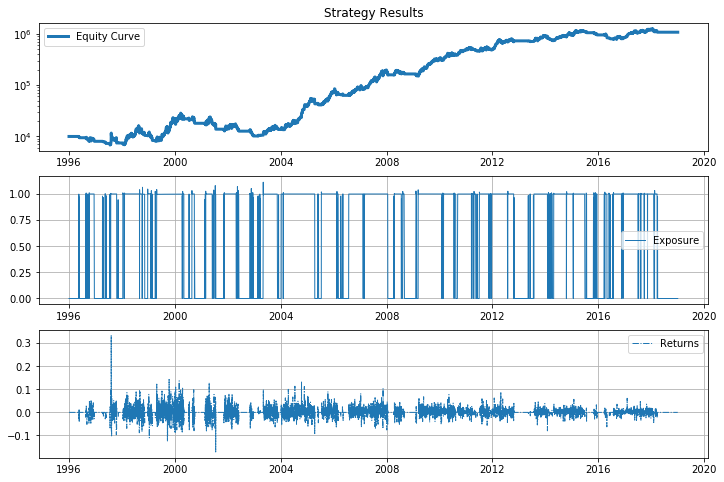

In [7]:
# params for zipline engine
results = run_algorithm(
    start=start_date,
    end=end_date,
    initialize=initialize,
    analyze=analyze,
    handle_data=handle_data,
    capital_base=10000,
    data_frequency= 'daily', bundle='quandl'
)

In [9]:
# NOTE: manually fix source benchmarks.py and loader.py to fix data issue

1 - equity curve, the value development of our fictive portfolio

2 - the exposure (aka leverage)

3 - daily percentage returns